Result visualization of cpp algorithm. This has had a lot of variations and a lot of runs in order to look closely at the peaks that I was missing and I tried to prune my algorithm to get close to the given spikes as possible

In [1]:
import numpy as np
import pylab as pl

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [73]:
## reading original spikes, and the ones read from cpp processed files
cppResult = np.loadtxt('./data/demo_spikes_5.dat');
origSpikes = np.loadtxt('./data/spikes5.dat');
output = np.loadtxt('./data/output5.dat');

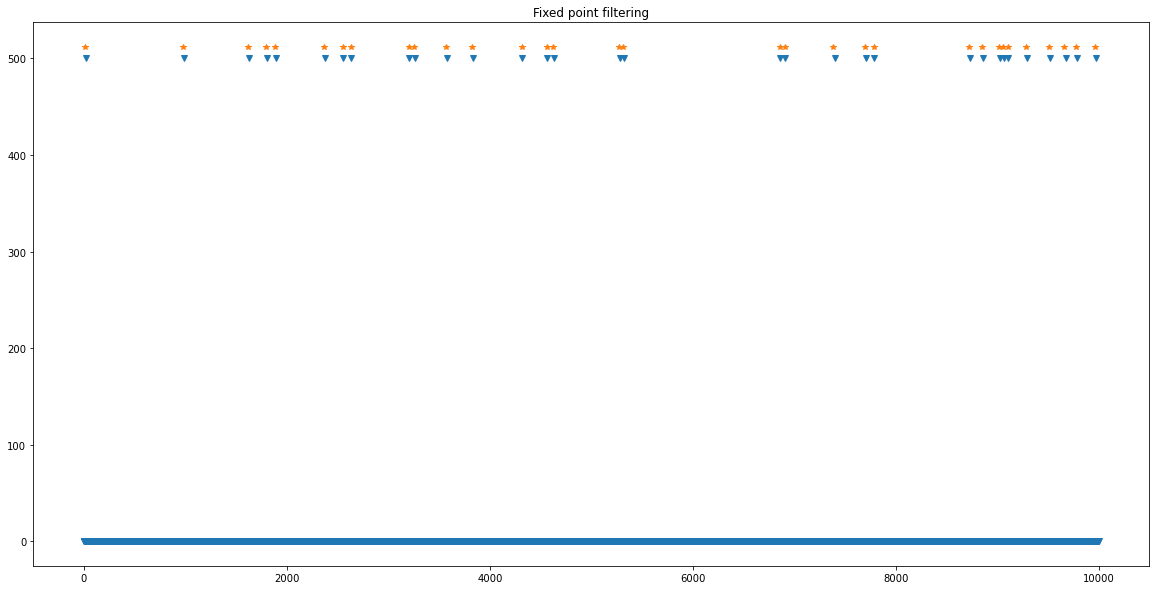

In [72]:
pl.rcParams["figure.figsize"] = [20, 10]
pl.title('Fixed point filtering');
pl.plot(500*cppResult[10000:20000], 'v');
pl.plot(origSpikes[10000:20000], '*');
pl.show();

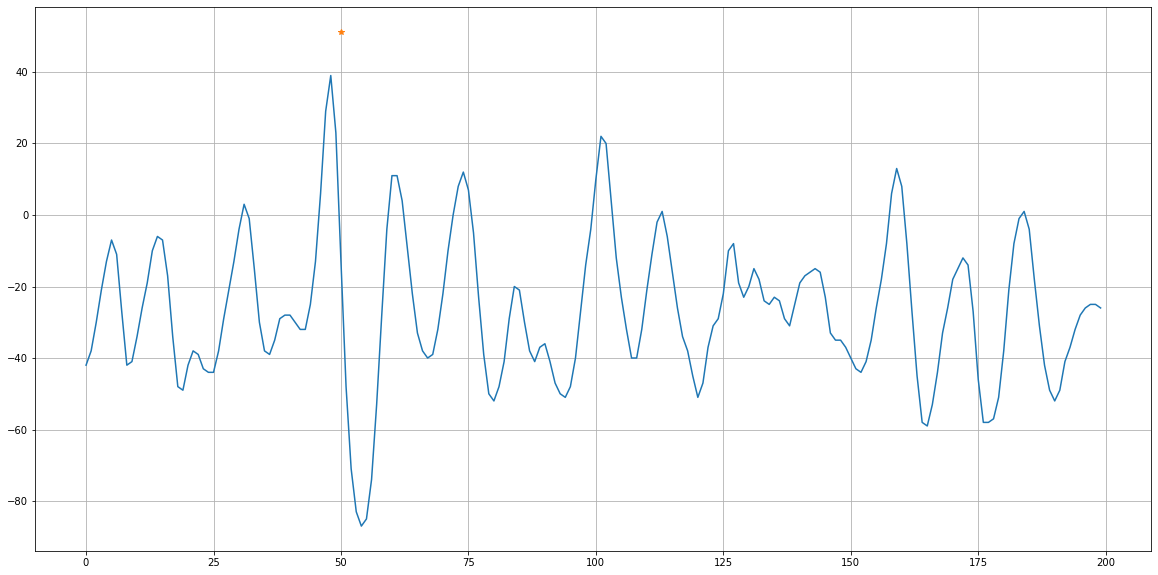

In [68]:
pl.plot(output[104000:104200]);
pl.plot(0.1*origSpikes[104000:104200], '*');
pl.grid()
pl.show();

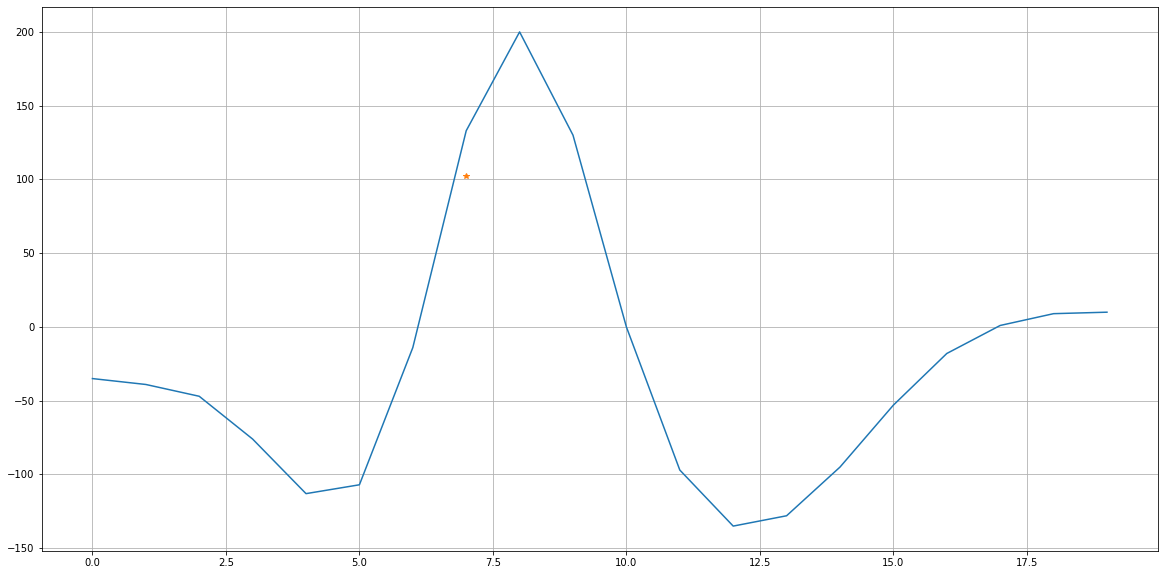

In [173]:
pl.plot(output[1333:1353]);
pl.plot(0.2*origSpikes[1333:1353], '*');
pl.grid()
pl.show();

In [182]:
test_samples = output[3300:3400]
template_up = output[1333:1353]
template_down = output[3730:3750]

for i in range(len(test_samples)-20):
    cc_up = np.corrcoef(template_up, test_samples[i:i+20])[0][1]
    cc_down = np.corrcoef(template_down, test_samples[i:i+20])[0][1]
    print(cc_down)
    if cc_up > 0.4 and test_samples[i+7]>4*22:
        print("spike up", cc_up, i+7)
    if cc_down > 0.4 and test_samples[i+7]<4*22:
        print("spike down", cc_down, i+7)

0.3440066831692195
0.05407679677341857
-0.28064751374164154
-0.5750055483343771
-0.7089438153404808
-0.6078962246910554
-0.3139449998056089
0.0596920785013804
0.3747549424606874
0.5215655677631922
spike down 0.5215655677631922 16
0.48628363156904586
spike down 0.48628363156904586 17
0.37014583158715525
0.23088552840647902
0.052423798071328485
-0.1361248273301621
-0.20642038713828686
-0.1537939222065873
-0.11245858401792119
-0.14353807012581293
-0.1859725112941447
-0.21280404749172832
-0.16706682490742433
-0.03213641308544046
0.08243809302137005
0.17825166227865996
0.20843149143276557
0.15013213473628204
-0.017295298509619517
-0.19437855591456124
-0.3259400145221204
-0.29599826422243186
-0.21337112434721442
-0.04013459732100497
0.19263083911835632
0.32346568688021177
0.2814894688422882
0.10544802110594009
-0.12726348357791625
-0.3276115782121559
-0.3584494338365833
-0.06363113923146364
0.4752290941164294
spike down 0.4752290941164294 48
0.8110570451194803
spike down 0.8110570451194803 4

In [23]:
len(np.where(np.array(cppResult[1000:])>0)[0])

3449

In [24]:
len(np.where(np.array(origSpikes[1000:])>0)[0])

3519

Algorithm to detect spikes

at each filtered sample, y:

if y<

In [98]:
for i in range(len(origSpikes[3200:3400])):
    if(origSpikes[3200+i] != "nan"):
        print(i, origSpikes[3200+i])

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 512.0
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
133 nan
134 nan
135 nan
136 nan
137 nan
138 

In [230]:
test_samples = output[1000:4000]
test_samples2 = output[3001:4001]

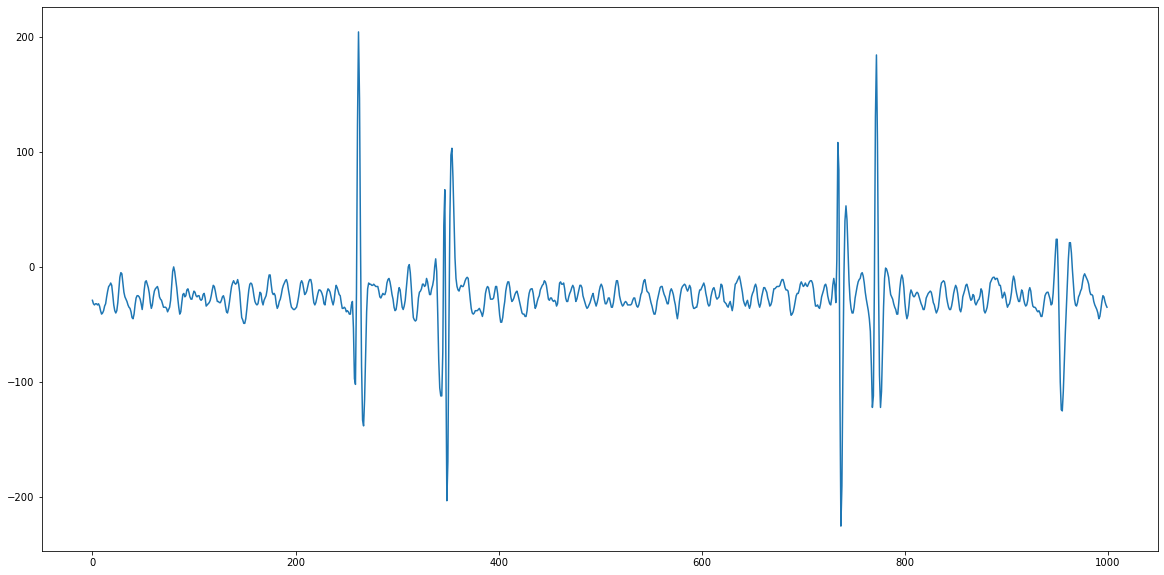

In [186]:
pl.plot(test_samples)

In [50]:
## lookahead smoothing:

inputArr = output[560:600]
outputArr = np.zeros(len(inputArr))

buffLen = 0
currDir = ""
prevDir = ""
currLow = 5000
currHigh = -5000
three_state_values = [0, 0, 0]
three_previous_states = ["", "", ""]
three_states = ["", "", ""]
peaks = 0

def replaceBuff(i, b, val, three_states):
    outputArr[i-b:i+1] = val
    print(three_states, three_state_values)
    if (three_states[0]=="down" and three_states[1]=="up" and three_states[2]=="down") and (three_state_values[0] < -50 and
                                                                                           three_state_values[1]>100 and 
                                                                                           three_state_values[2]<-50):
        print("dud")

    if (three_states[0]=="up" and three_states[1]=="down" and three_states[2]=="up") and (
                                                                                          three_state_values[0] < 150 and
                                                                                           three_state_values[1]<-100 and
                                                                                         three_state_values[2]<150):
        print("udu")



for i in range(1, len(inputArr)):
    if inputArr[i]<=inputArr[i-1]:
        currDir = "down"
        buffLen += 1
        if currDir!=prevDir:
#             print(three_states, three_state_values)
            currHigh = inputArr[i-1]
            three_states[:-1] = three_states[1:]
            three_state_values[:-1] = three_state_values[1:]
            three_state_values[2] = currHigh
            three_states[2] = prevDir
            replaceBuff(i, buffLen, currHigh, three_states)
            buffLen = 0
        
    if inputArr[i]>=inputArr[i-1]:
        currDir = "up"
        buffLen += 1
        if currDir!=prevDir:
#             print(three_states, three_state_values)
            currLow = inputArr[i-1]
            three_states[:-1] = three_states[1:]
            three_state_values[:-1] = three_state_values[1:]
            three_state_values[2] = currLow
            three_states[2] = prevDir
            replaceBuff(i, buffLen, currLow, three_states)
            buffLen = 0
        
    prevDir = currDir

['', '', ''] [0, 0, -16.0]
['', '', 'down'] [0, -16.0, -28.0]
['', 'down', 'up'] [-16.0, -28.0, -23.0]
['down', 'up', 'down'] [-28.0, -23.0, -26.0]
['up', 'down', 'up'] [-23.0, -26.0, -25.0]
['down', 'up', 'down'] [-26.0, -25.0, -28.0]
['up', 'down', 'up'] [-25.0, -28.0, 80.0]
['down', 'up', 'down'] [-28.0, 80.0, -122.0]
['up', 'down', 'up'] [80.0, -122.0, -16.0]
udu
['down', 'up', 'down'] [-122.0, -16.0, -27.0]
['up', 'down', 'up'] [-16.0, -27.0, -15.0]
['down', 'up', 'down'] [-27.0, -15.0, -31.0]


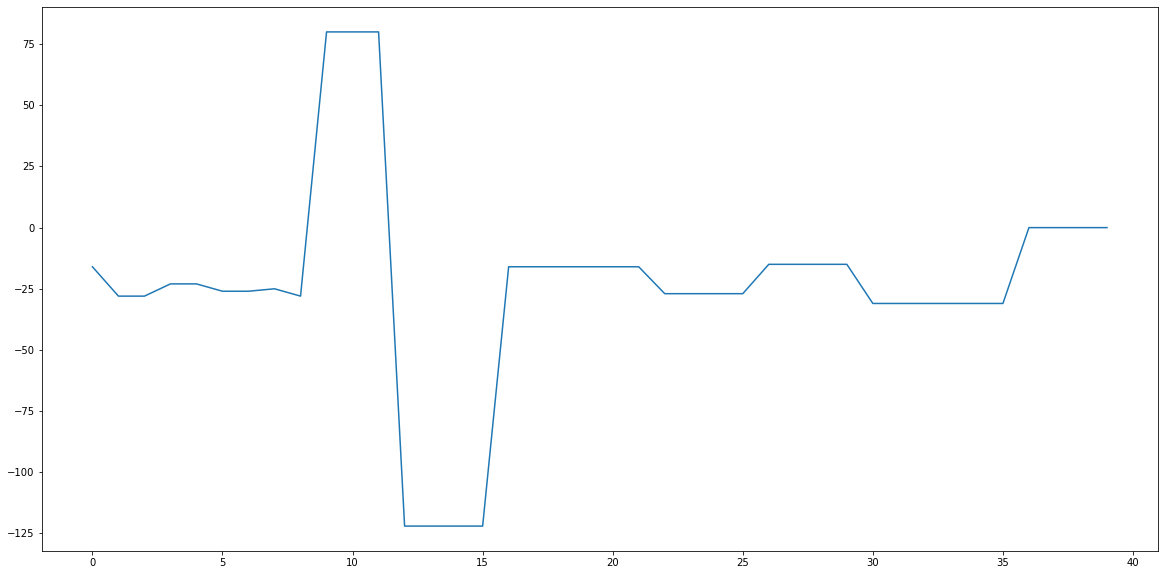

In [51]:
# pl.plot(inputArr)
pl.plot(outputArr[:2000])
pl.show()

In [236]:
peaks

0